In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score

In [2]:
cd '/content/drive/MyDrive/Colab Notebooks/DW_Matrix'

/content/drive/MyDrive/Colab Notebooks/DW_Matrix


In [3]:
df = pd.read_csv("data/men_shoes.csv",low_memory=False)
df.shape

(18280, 48)

In [4]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [5]:
y_true = df.prices_amountmin
mean_price = np.mean(df.prices_amountmin)
mean_price

93.53952188183217

In [6]:
y_pred = [mean_price] * df.shape[0]

In [7]:
mean_absolute_error(y_true,y_pred)

63.968341227870624

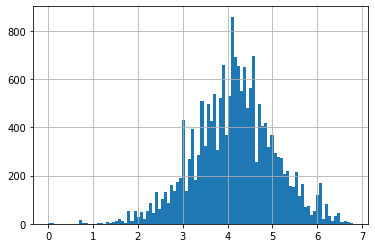

In [8]:
np.log1p(df.prices_amountmin).hist(bins =100)

In [9]:
df.brand.value_counts()

Nike              1709
PUMA               574
Ralph Lauren       524
New Balance        361
VANS               356
                  ... 
Alexanders           1
NewBalance           1
carhartt             1
Sport                1
Boston Harbour       1
Name: brand, Length: 1856, dtype: int64

In [10]:
df['brand_cat'] = df['brand'].factorize()[0]

In [11]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth = 5)

  scores = cross_val_score(model,X,y,scoring = 'neg_mean_absolute_error')
  return np.mean(scores),np.std(scores)


In [12]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [13]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [14]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [15]:
run_model(['brand_cat','manufacturer_cat'])

(-58.53930419908598, 4.311223231615441)

In [21]:
!git add matrix_one/Day4.ipynb

In [22]:
!git config --global user.email "agoleba@vp.pl"
!git config --global user.name "Goldas99"
!git commit -m "Build Decision Tree Model "

[main 626ab22] Build Decision Tree Model
 1 file changed, 1 insertion(+), 1 deletion(-)


In [23]:
!git pull

Already up to date.


In [1]:
!git push -f origin main